# Outline
* <a href=#pandasBasics>Pandas Basics</a>
    * <a href=#inputAndOutput>Input and Output</a>
    * <a href=#examiningDataFrame>Examining DataFrame</a>
    * <a href=#indexAndSlicing>Indexing and Slicing</a>
    * <a href=#conditional>Conditional</a>
    * <a href=#changingDataType>Changing Data Type</a>
    * <a href=#sort>Sort</a>
    * <a href=#applyAndApplymap>Apply and Applymap</a> (Optional)
    * <a href=#plot>Plot</a>

## Pandas Basics <a name='pandasBasics' />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.__version__)

0.23.4


In [2]:
from pathlib import Path
data_folder = Path("../data/")

### Input and Output <a name='inputAndOutput' />

In [3]:
news = pd.read_csv(data_folder / "news.csv")

In [4]:
polls = pd.read_json(data_folder / "polls.json")

#### pandas.DataFrame.to_csv

In [5]:
polls.to_csv(data_folder / "polls.csv", index=False)

#### Pickle (Serialization)

In [6]:
polls.to_pickle(data_folder / "polls.p")
polls_pickle = pd.read_pickle(data_folder / "polls.p")

### Examining DataFrame<a name='examiningDataFrame' />

In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
title       120 non-null object
content     120 non-null object
time        120 non-null object
provider    120 non-null object
url         120 non-null object
dtypes: object(5)
memory usage: 4.8+ KB


In [8]:
news.describe()

,title,content,time,provider,url
count,120,120,120,120,120
unique,120,120,108,19,120
top,普悠瑪翻覆釀百死傷 韓國瑜「這舉動」網友狂讚,政治中心／綜合報導\n民進黨台北市長候選人姚文智士林北投後援會今（20）日晚間成立，總統蔡英...,2018-10-21 06:43:23+08:00,中央社,https://tw.news.yahoo.com/侯友宜趕場競總成立大會-展求勝決心-06...
freq,1,1,10,14,1


In [9]:
news.head()

,title,content,time,provider,url
0,「把25年前韓國瑜打人事件當英雄看」陳水扁批：吳敦義「災難政治學」的表現,國民黨主席吳敦義日前提到高雄市長候選人韓國瑜過去打陳水扁，表示「很認同跟敬佩」並形容「允文允...,2018-10-22 12:16:02+08:00,風傳媒,https://tw.news.yahoo.com/把25年前韓國瑜打人事件當英雄看-陳水扁...
1,【Yahoo論壇／林青弘】柯文哲是否一再說謊？,柯文哲市長在台北市北投區七星公園造勢，行動競選總部的大卡車開進公園，違規臨停。競辦被開罰六張...,2018-10-22 14:00:26+08:00,林青弘,https://tw.news.yahoo.com/【yahoo論壇%EF%BC%8F林青弘...
2,【Yahoo論壇】民進黨誰最怕陳其邁落選？,讀者投書：廖念漢（現任奇策盟文宣部主任、曾任海巡署專聘講師）\n 《長平之戰》是戰國時代最戲...,2018-10-22 13:57:44+08:00,讀者投書,https://tw.news.yahoo.com/【yahoo論壇】民進黨誰最怕陳其邁落選...
3,抽中籤王 韓國瑜車隊掃街 民眾路邊紛比讚,國民黨高雄市長候選人韓國瑜聲勢上漲，又抽中一號籤王，心情相當興奮，立即展開掃街拜，經過的地方...,2018-10-22 13:32:00+08:00,EBC東森新聞,https://tw.news.yahoo.com/抽中籤王-韓國瑜車隊掃街-民眾路邊紛比讚...
4,百年土地公上香祈福 陳學聖提五不原則,【綜合報導】普悠瑪列車出軌意外舉國震驚如同國難，令社會大眾、競選團隊及陳學聖本人都感到十分沉...,2018-10-22 13:17:44+08:00,民眾日報,https://tw.news.yahoo.com/百年土地公上香祈福-陳學聖提五不原則-0...


In [10]:
news.tail(2)

,title,content,time,provider,url
118,林姿妙請韓國瑜站台 「韓流」氣勢壓過主角,宜蘭縣長選情廝殺激烈，國民黨候選人林姿妙，請來黨內人氣王韓國瑜、蔣萬安助陣，不過韓國瑜一出場...,2018-10-20 19:42:14+08:00,民視,https://tw.news.yahoo.com/林姿妙請韓國瑜站台-韓流-氣勢壓過主角-...
119,鄭進一南下高雄 力挺韓國瑜 (圖),資深音樂人鄭進一（左）20日南下高雄為國民黨高雄市長參選人韓國瑜（中）站台，鄭進一說，從電視...,2018-10-20 19:14:32+08:00,中央社,https://tw.news.yahoo.com/鄭進-南下高雄-力挺韓國瑜-圖-1114...


In [11]:
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
支持率     152 non-null object
時間      152 non-null object
有效樣本    152 non-null object
機構      152 non-null object
訪問主題    152 non-null object
dtypes: object(5)
memory usage: 6.0+ KB


In [12]:
polls.columns

Index(['支持率', '時間', '有效樣本', '機構', '訪問主題'], dtype='object')

### Indexing and Slicing<a name="indexingAndSlicing" />

In [13]:
# df[column]
news['title']

0      「把25年前韓國瑜打人事件當英雄看」陳水扁批：吳敦義「災難政治學」的表現
1                   【Yahoo論壇／林青弘】柯文哲是否一再說謊？
2                     【Yahoo論壇】民進黨誰最怕陳其邁落選？
3                      抽中籤王 韓國瑜車隊掃街 民眾路邊紛比讚
4                        百年土地公上香祈福 陳學聖提五不原則
5                     侯友宜客家後援總會成立！誓言拓展客文化據點
6             選不過別人就栽贓韓國瑜是黑道？ 孫大千：綠營比小學生還幼稚
7                    普悠瑪翻覆釀百死傷 韓國瑜「這舉動」網友狂讚
8                     黃偉哲競選總部開幕 蔡英文、賴清德合體造勢
9                         讚韓國瑜打扁 扁怒批吳敦義得意囂張
10               重提曾被韓國瑜推倒住院 扁轟：還真以為高雄市長贏定了
11               高雄反併吞大遊行 陳其邁：這三件事，讓國際都關注台灣
12                       白狼現身侯友宜鶯歌場 侯辦急劃清關係
13                      社評：柯文哲的「台灣商品論」想說給誰聽
14                    韓流在全台發威 韓國瑜和民眾高唱中華民國頌
15                       客家義民祭 柯文哲、丁守中同框拚人氣
16                    柯文哲接連失言 丁守中、姚文智、李錫錕砲轟
17                韓國瑜到台南為議員盧崑福站台 婦女高喊「媽媽愛你」
18                     同框蘇貞昌「劃清界線」 林義豐：我非綠色
19                陳其邁為普悠瑪車禍死傷者默哀 取消明日所有公開行程
20               普悠瑪意外 丁守中明日競選活動暫停並呼籲民眾踴躍捐血
21                         普悠瑪事故！陳其邁「默哀」表哀悼
22             青年論壇辯論 姚文智左談太陽花 右

In [14]:
# df.column
news.title

0      「把25年前韓國瑜打人事件當英雄看」陳水扁批：吳敦義「災難政治學」的表現
1                   【Yahoo論壇／林青弘】柯文哲是否一再說謊？
2                     【Yahoo論壇】民進黨誰最怕陳其邁落選？
3                      抽中籤王 韓國瑜車隊掃街 民眾路邊紛比讚
4                        百年土地公上香祈福 陳學聖提五不原則
5                     侯友宜客家後援總會成立！誓言拓展客文化據點
6             選不過別人就栽贓韓國瑜是黑道？ 孫大千：綠營比小學生還幼稚
7                    普悠瑪翻覆釀百死傷 韓國瑜「這舉動」網友狂讚
8                     黃偉哲競選總部開幕 蔡英文、賴清德合體造勢
9                         讚韓國瑜打扁 扁怒批吳敦義得意囂張
10               重提曾被韓國瑜推倒住院 扁轟：還真以為高雄市長贏定了
11               高雄反併吞大遊行 陳其邁：這三件事，讓國際都關注台灣
12                       白狼現身侯友宜鶯歌場 侯辦急劃清關係
13                      社評：柯文哲的「台灣商品論」想說給誰聽
14                    韓流在全台發威 韓國瑜和民眾高唱中華民國頌
15                       客家義民祭 柯文哲、丁守中同框拚人氣
16                    柯文哲接連失言 丁守中、姚文智、李錫錕砲轟
17                韓國瑜到台南為議員盧崑福站台 婦女高喊「媽媽愛你」
18                     同框蘇貞昌「劃清界線」 林義豐：我非綠色
19                陳其邁為普悠瑪車禍死傷者默哀 取消明日所有公開行程
20               普悠瑪意外 丁守中明日競選活動暫停並呼籲民眾踴躍捐血
21                         普悠瑪事故！陳其邁「默哀」表哀悼
22             青年論壇辯論 姚文智左談太陽花 右

In [15]:
# df.loc[row_name, column_name]
polls.loc[10, '支持率']

{'其他': '25.4%', '林佳龍': '40.0%', '盧秀燕': '34.6%'}

In [16]:
# df.iloc[row_number, column_number]
polls.iloc[10, 0]

{'其他': '25.4%', '林佳龍': '40.0%', '盧秀燕': '34.6%'}

In [17]:
# use : to select a range
polls.iloc[0:3, 1:4]

,時間,有效樣本,機構
0,2018/10/22,1077,旺旺中時
1,2018/10/19,1026,TVBS
2,2018/10/18,1075,信傳媒


In [18]:
polls.iloc[1:4, :]

,支持率,時間,有效樣本,機構,訪問主題
1,"{'侯友宜': '50.0%', '其他': '20.0%', '蘇貞昌': '30.0%'}",2018/10/19,1026,TVBS,新北市長當選人
2,"{'魏明谷': '34.5%', '其他': '27.4%', '王惠美': '33.3%'...",2018/10/18,1075,信傳媒,彰化縣長當選人
3,"{'其他': '23.0%', '陳其邁': '35.0%', '韓國瑜': '42.0%'}",2018/10/17,1009,TVBS,高雄市長當選人


In [19]:
# use list to select a multiple items
polls.loc[[1,5,2], ['機構','時間']]

,機構,時間
1,TVBS,2018/10/19
5,ETtoday 東森新聞雲,2018/10/15
2,信傳媒,2018/10/18


### Conditional<a name="conditional" />

In [20]:
polls['機構'] == 'TVBS'

0      False
1       True
2      False
3       True
4      False
5      False
6       True
7      False
8       True
9       True
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147     True
148    False
149    False
150     True
151     True
Name: 機構, Length: 152, dtype: bool

In [21]:
polls[polls['機構'] == 'TVBS']

,支持率,時間,有效樣本,機構,訪問主題
1,"{'侯友宜': '50.0%', '其他': '20.0%', '蘇貞昌': '30.0%'}",2018/10/19,1026,TVBS,新北市長當選人
3,"{'其他': '23.0%', '陳其邁': '35.0%', '韓國瑜': '42.0%'}",2018/10/17,1009,TVBS,高雄市長當選人
6,"{'黃敏惠': '35.0%', '其他': '21.0%', '涂醒者': '29.0%'...",2018/10/15,803,TVBS,嘉義市長當選人
8,"{'饒慶鈴': '40.0%', '其他': '24.0%', '劉櫂豪': '31.0%'...",2018/10/11,985,TVBS,台東縣長當選人
9,"{'林姿妙': '47.0%', '陳歐珀': '19.0%', '其他': '34.0%'}",2018/10/09,830,TVBS,宜蘭縣長當選人
39,"{'其他': '20.0%', '柯文哲': '37.0%', '姚文智': '11.0%'...",2018/09/17,1001,TVBS,台北市長當選人
41,"{'侯友宜': '48.0%', '其他': '20.0%', '蘇貞昌': '32.0%'}",2018/09/17,1011,TVBS,新北市長當選人
42,"{'楊麗環': '6.0%', '鄭文燦': '54.0%', '陳學聖': '17.0%'...",2018/09/17,801,TVBS,桃園市長當選人
43,"{'林佳龍': '35.0%', '盧秀燕': '38.0%', '其他': '27.0%'}",2018/09/17,1015,TVBS,台中市長當選人
44,"{'黃偉哲': '33.0%', '其他': '40.0%', '高思博': '14.0%'...",2018/09/17,859,TVBS,台南市長當選人


### Changing Data Type<a name="changingDataType" />

In [22]:
# polls['有效樣本'] > 1000

In [23]:
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
支持率     152 non-null object
時間      152 non-null object
有效樣本    152 non-null object
機構      152 non-null object
訪問主題    152 non-null object
dtypes: object(5)
memory usage: 6.0+ KB


In [24]:
polls['有效樣本'] = pd.to_numeric(polls['有效樣本'], errors='coerce')
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
支持率     152 non-null object
時間      152 non-null object
有效樣本    149 non-null float64
機構      152 non-null object
訪問主題    152 non-null object
dtypes: float64(1), object(4)
memory usage: 6.0+ KB


In [25]:
polls[polls['有效樣本'] > 1000]

,支持率,時間,有效樣本,機構,訪問主題
0,"{'侯友宜': '49.1%', '其他': '19.9%', '蘇貞昌': '31.0%'}",2018/10/22,1077.0,旺旺中時,新北市長當選人
1,"{'侯友宜': '50.0%', '其他': '20.0%', '蘇貞昌': '30.0%'}",2018/10/19,1026.0,TVBS,新北市長當選人
2,"{'魏明谷': '34.5%', '其他': '27.4%', '王惠美': '33.3%'...",2018/10/18,1075.0,信傳媒,彰化縣長當選人
3,"{'其他': '23.0%', '陳其邁': '35.0%', '韓國瑜': '42.0%'}",2018/10/17,1009.0,TVBS,高雄市長當選人
4,"{'其他': '26.2%', '柯文哲': '37.5%', '姚文智': '11.3%'...",2018/10/15,1070.0,美麗島電子報,台北市長當選人
5,"{'其他': '38.8%', '潘孟安': '36.4%', '蘇清泉': '24.8%'}",2018/10/15,1271.0,ETtoday 東森新聞雲,屏東縣長當選人
7,"{'侯友宜': '49.4%', '其他': '17.8%', '蘇貞昌': '32.8%'}",2018/10/11,1077.0,旺旺中時,新北市長當選人
10,"{'林佳龍': '40.0%', '盧秀燕': '34.6%', '其他': '25.4%'}",2018/10/08,1084.0,信傳媒,台中市長當選人
11,"{'林姿妙': '42.0%', '陳歐珀': '13.0%', '其他': '45.0%'}",2018/10/08,1074.0,聯合報,宜蘭縣長當選人
12,"{'其他': '16.0%', '柯文哲': '41.6%', '姚文智': '15.2%'...",2018/10/08,1078.0,旺旺中時,台北市長當選人


In [26]:
# As exercise
polls['時間'] = pd.to_datetime(polls['時間'])
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
支持率     152 non-null object
時間      152 non-null datetime64[ns]
有效樣本    149 non-null float64
機構      152 non-null object
訪問主題    152 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.0+ KB


In [27]:
polls[polls['時間'] > '2018-07-01']

,支持率,時間,有效樣本,機構,訪問主題
0,"{'侯友宜': '49.1%', '其他': '19.9%', '蘇貞昌': '31.0%'}",2018-10-22,1077.0,旺旺中時,新北市長當選人
1,"{'侯友宜': '50.0%', '其他': '20.0%', '蘇貞昌': '30.0%'}",2018-10-19,1026.0,TVBS,新北市長當選人
2,"{'魏明谷': '34.5%', '其他': '27.4%', '王惠美': '33.3%'...",2018-10-18,1075.0,信傳媒,彰化縣長當選人
3,"{'其他': '23.0%', '陳其邁': '35.0%', '韓國瑜': '42.0%'}",2018-10-17,1009.0,TVBS,高雄市長當選人
4,"{'其他': '26.2%', '柯文哲': '37.5%', '姚文智': '11.3%'...",2018-10-15,1070.0,美麗島電子報,台北市長當選人
5,"{'其他': '38.8%', '潘孟安': '36.4%', '蘇清泉': '24.8%'}",2018-10-15,1271.0,ETtoday 東森新聞雲,屏東縣長當選人
6,"{'黃敏惠': '35.0%', '其他': '21.0%', '涂醒者': '29.0%'...",2018-10-15,803.0,TVBS,嘉義市長當選人
7,"{'侯友宜': '49.4%', '其他': '17.8%', '蘇貞昌': '32.8%'}",2018-10-11,1077.0,旺旺中時,新北市長當選人
8,"{'饒慶鈴': '40.0%', '其他': '24.0%', '劉櫂豪': '31.0%'...",2018-10-11,985.0,TVBS,台東縣長當選人
9,"{'林姿妙': '47.0%', '陳歐珀': '19.0%', '其他': '34.0%'}",2018-10-09,830.0,TVBS,宜蘭縣長當選人


In [28]:
polls['機構'] = polls['機構'].astype('category')
polls['訪問主題'] = polls['訪問主題'].astype('category')
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
支持率     152 non-null object
時間      152 non-null datetime64[ns]
有效樣本    149 non-null float64
機構      152 non-null category
訪問主題    152 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), object(1)
memory usage: 5.5+ KB


### Sort <a name='sort' />

In [29]:
polls.sort_values('有效樣本')

,支持率,時間,有效樣本,機構,訪問主題
80,"{'黃偉哲': '36.6%', '其他': '50.4%', '高思博': '13.0%'}",2018-07-15,0.0,年代電視,台南市長當選人
125,"{'侯友宜': '54.3%', '其他': '19.3%', '蘇貞昌': '26.4%'}",2018-04-07,0.0,旺旺中時,新北市長當選人
126,"{'侯友宜': '61.4%', '其他': '11.1%', '蘇貞昌': '27.5%'}",2018-04-07,541.0,蘋果日報,新北市長當選人
42,"{'楊麗環': '6.0%', '鄭文燦': '54.0%', '陳學聖': '17.0%'...",2018-09-17,801.0,TVBS,桃園市長當選人
70,"{'其他': '24.0%', '鄭文燦': '56.0%', '陳學聖': '20.0%'}",2018-07-24,803.0,TVBS,桃園市長當選人
6,"{'黃敏惠': '35.0%', '其他': '21.0%', '涂醒者': '29.0%'...",2018-10-15,803.0,TVBS,嘉義市長當選人
151,"{'林姿妙': '57.0%', '陳歐珀': '23.0%', '其他': '20.0%'}",2017-07-19,811.0,TVBS,宜蘭縣長當選人
112,"{'其他': '15.0%', '柯文哲': '38.0%', '姚文智': '8.0%',...",2018-05-19,819.0,聯合報,台北市長當選人
9,"{'林姿妙': '47.0%', '陳歐珀': '19.0%', '其他': '34.0%'}",2018-10-09,830.0,TVBS,宜蘭縣長當選人
72,"{'黃偉哲': '41.0%', '其他': '37.0%', '高思博': '15.0%'...",2018-07-24,833.0,TVBS,台南市長當選人


In [30]:
polls.sort_values('有效樣本', ascending=False)

,支持率,時間,有效樣本,機構,訪問主題
104,"{'其他': '50.4%', '翁章梁': '34.3%', '吳育仁': '15.3%'}",2018-06-04,3518.0,ETtoday 東森新聞雲,嘉義縣長當選人
107,"{'其他': '47.6%', '李進勇': '32.8%', '張麗善': '19.6%'}",2018-05-31,3518.0,ETtoday 東森新聞雲,雲林縣長當選人
109,"{'黃偉哲': '31.2%', '其他': '50.3%', '高思博': '18.5%'...",2018-05-28,3518.0,ETtoday 東森新聞雲,台南市長當選人
105,"{'黃敏惠': '31.2%', '其他': '32.6%', '涂醒哲': '18.2%'...",2018-06-04,3518.0,ETtoday 東森新聞雲,嘉義市長當選人
101,"{'林姿妙': '41.2%', '陳歐珀': '15.8%', '其他': '43.0%'}",2018-06-12,3453.0,ETtoday 東森新聞雲,宜蘭縣長當選人
93,"{'饒慶鈴': '34.1%', '其他': '38.1%', '劉櫂豪': '27.8%'}",2018-06-22,3435.0,ETtoday 東森新聞雲,台東縣長當選人
100,"{'其他': '36.6%', '徐榛蔚': '44.4%', '劉曉玫': '19.0%'}",2018-06-13,3435.0,ETtoday 東森新聞雲,花蓮縣長當選人
87,"{'其他': '41.2%', '潘孟安': '37.9%', '蘇清泉': '20.9%'}",2018-06-27,3273.0,ETtoday 東森新聞雲,屏東縣長當選人
115,"{'其他': '37.6%', '陳其邁': '32.0%', '韓國瑜': '30.4%'}",2018-05-04,3273.0,ETtoday 東森新聞雲,高雄市長當選人
131,"{'其他': '28.9%', '林明溱': '59.4%', '洪國浩': '11.7%'}",2018-03-19,3240.0,ETtoday 東森新聞雲,南投縣長當選人


In [31]:
# df.set_index([column1, column2])
polls.set_index('時間')

,支持率,有效樣本,機構,訪問主題
時間,,,,
2018-10-22,"{'侯友宜': '49.1%', '其他': '19.9%', '蘇貞昌': '31.0%'}",1077.0,旺旺中時,新北市長當選人
2018-10-19,"{'侯友宜': '50.0%', '其他': '20.0%', '蘇貞昌': '30.0%'}",1026.0,TVBS,新北市長當選人
2018-10-18,"{'魏明谷': '34.5%', '其他': '27.4%', '王惠美': '33.3%'...",1075.0,信傳媒,彰化縣長當選人
2018-10-17,"{'其他': '23.0%', '陳其邁': '35.0%', '韓國瑜': '42.0%'}",1009.0,TVBS,高雄市長當選人
2018-10-15,"{'其他': '26.2%', '柯文哲': '37.5%', '姚文智': '11.3%'...",1070.0,美麗島電子報,台北市長當選人
2018-10-15,"{'其他': '38.8%', '潘孟安': '36.4%', '蘇清泉': '24.8%'}",1271.0,ETtoday 東森新聞雲,屏東縣長當選人
2018-10-15,"{'黃敏惠': '35.0%', '其他': '21.0%', '涂醒者': '29.0%'...",803.0,TVBS,嘉義市長當選人
2018-10-11,"{'侯友宜': '49.4%', '其他': '17.8%', '蘇貞昌': '32.8%'}",1077.0,旺旺中時,新北市長當選人
2018-10-11,"{'饒慶鈴': '40.0%', '其他': '24.0%', '劉櫂豪': '31.0%'...",985.0,TVBS,台東縣長當選人


In [32]:
polls_arranged = polls.set_index(['訪問主題','時間'])
polls_arranged.head()

支持率    有效樣本  \
訪問主題    時間                                                                      
新北市長當選人 2018-10-22    {'侯友宜': '49.1%', '其他': '19.9%', '蘇貞昌': '31.0%'}  1077.0   
        2018-10-19    {'侯友宜': '50.0%', '其他': '20.0%', '蘇貞昌': '30.0%'}  1026.0   
彰化縣長當選人 2018-10-18  {'魏明谷': '34.5%', '其他': '27.4%', '王惠美': '33.3%'...  1075.0   
高雄市長當選人 2018-10-17    {'其他': '23.0%', '陳其邁': '35.0%', '韓國瑜': '42.0%'}  1009.0   
台北市長當選人 2018-10-15  {'其他': '26.2%', '柯文哲': '37.5%', '姚文智': '11.3%'...  1070.0   

                        機構  
訪問主題    時間                  
新北市長當選人 2018-10-22    旺旺中時  
        2018-10-19    TVBS  
彰化縣長當選人 2018-10-18     信傳媒  
高雄市長當選人 2018-10-17    TVBS  
台北市長當選人 2018-10-15  美麗島電子報

In [33]:
polls_arranged.sort_index()

支持率    有效樣本  \
訪問主題    時間                                                                      
南投縣長當選人 2018-03-19    {'其他': '28.9%', '林明溱': '59.4%', '洪國浩': '11.7%'}  3240.0   
        2018-03-28     {'其他': '53.2%', '林明溱': '37.9%', '洪國浩': '8.9%'}  1084.0   
台中市長當選人 2017-11-10    {'林佳龍': '37.4%', '盧秀燕': '33.1%', '其他': '29.5%'}  1071.0   
        2017-12-28    {'林佳龍': '36.1%', '盧秀燕': '35.1%', '其他': '28.8%'}  1070.0   
        2018-02-09    {'林佳龍': '35.8%', '盧秀燕': '37.6%', '其他': '26.6%'}  1073.0   
        2018-02-13    {'林佳龍': '36.4%', '盧秀燕': '30.6%', '其他': '33.0%'}  1010.0   
        2018-03-05    {'林佳龍': '32.6%', '盧秀燕': '32.0%', '其他': '35.4%'}  2259.0   
        2018-05-03    {'林佳龍': '33.0%', '盧秀燕': '35.7%', '其他': '31.3%'}  1003.0   
        2018-05-28    {'林佳龍': '32.0%', '盧秀燕': '39.0%', '其他': '29.0%'}  1001.0   
        2018-06-29    {'林佳龍': '33.0%', '盧秀燕': '39.7%', '其他': '27.3%'}  2520.0   
        2018-07-24    {'林佳龍': '33.0%', '盧秀燕': '39.0%', '其他': '28.0%'}  1077.0   
        2018-08-01    {'林佳龍': '43.9%', '盧秀燕': '31.1%', '其他': '25.0%'}  1100.0   
        2018-08-10    {'林佳龍': '35.8%', '盧秀燕': '38.0%', '其他': '26.2%'}  1088.0   
        2018-08-14    {'林佳龍': '31.0%', '盧秀燕': '35.6%', '其他': '33.4%'}  1607.0   
        2018-08-25    {'林佳龍': '38.5%', '盧秀燕': '32.4%', '其他': '39.1%'}  1069.0   
        2018-09-13    {'林佳龍': '33.0%', '盧秀燕': '34.0%', '其他': '33.0%'}  1097.0   
        2018-09-17    {'林佳龍': '35.0%', '盧秀燕': '38.0%', '其他': '27.0%'}  1015.0   
        2018-09-18    {'林佳龍': '30.3%', '盧秀燕': '30.9%', '其他': '38.8%'}  1068.0   
        2018-10-01    {'林佳龍': '38.1%', '盧秀燕': '40.2%', '其他': '21.7%'}  1087.0   
        2018-10-08    {'林佳龍': '40.0%', '盧秀燕': '34.6%', '其他': '25.4%'}  1084.0   
台北市長當選人 2018-05-14  {'其他': '16.7%', '柯文哲': '35.2%', '姚文智': '15.0%'...  1073.0   
        2018-05-17  {'其他': '12.7%', '柯文哲': '36.4%', '姚文智': '13.4%'...  1848.0   
        2018-05-19  {'其他': '15.0%', '柯文哲': '38.0%', '姚文智': '8.0%',...   819.0   
        2018-05-29  {'其他': '28.4%', '柯文哲': '29.0%', '姚文智': '13.5%'...  1079.0   
        2018-05-31  {'其他': '23.0%', '柯文哲': '31.0%', '姚文智': '13.0%'...  1195.0   
        2018-07-11  {'其他': '22.6%', '柯文哲': '38.9%', '姚文智': '11.0%'...  1070.0   
        2018-07-12  {'其他': '14.4%', '柯文哲': '38.7%', '姚文智': '16.4%'...  1082.0   
        2018-07-24  {'其他': '19.0%', '柯文哲': '40.0%', '姚文智': '11.0%'...   870.0   
        2018-07-30  {'其他': '21.6%', '柯文哲': '42.0%', '姚文智': '5.4%',...  1857.0   
        2018-09-01  {'其他': '27.0%', '柯文哲': '33.4%', '姚文智': '14.9%'...  1070.0   
...                                                               ...     ...   
桃園市長當選人 2018-04-11    {'其他': '21.6%', '鄭文燦': '46.7%', '陳學聖': '31.7%'}  1841.0   
        2018-06-12    {'其他': '23.6%', '鄭文燦': '51.5%', '陳學聖': '24.9%'}  1007.0   
        2018-06-23    {'其他': '18.0%', '鄭文燦': '61.0%', '陳學聖': '21.0%'}   853.0   
        2018-07-24    {'其他': '24.0%', '鄭文燦': '56.0%', '陳學聖': '20.0%'}   803.0   
        2018-08-20    {'其他': '25.5%', '鄭文燦': '50.7%', '陳學聖': '23.8%'}  1580.0   
        2018-09-17  {'楊麗環': '6.0%', '鄭文燦': '54.0%', '陳學聖': '17.0%'...   801.0   
        2018-09-21  {'楊麗環': '5.4%', '鄭文燦': '42.3%', '陳學聖': '18.5%'...  1070.0   
        2018-09-27  {'楊麗環': '6.0%', '鄭文燦': '51.0%', '陳學聖': '16.0%'...  1070.0   
澎湖縣長當選人 2018-01-18    {'賴峰偉': '39.4%', '陳光復': '26.4%', '其他': '34.2%'}  1068.0   
        2018-07-23    {'賴峰偉': '29.1%', '陳光復': '20.1%', '其他': '50.8%'}  2607.0   
花蓮縣長當選人 2018-03-25    {'其他': '42.9%', '徐榛蔚': '40.1%', '劉曉玫': '17.0%'}  1071.0   
        2018-06-13    {'其他': '36.6%', '徐榛蔚': '44.4%', '劉曉玫': '19.0%'}  3435.0   
苗栗縣長當選人 2018-06-13    {'其他': '25.5%', '徐耀昌': '56.9%', '徐定禎': '17.6%'}  1071.0   
        2018-07-20    {'其他': '47.6%', '徐耀昌': '35.9%', '徐定禎': '16.5%'}  2093.0   
連江縣長當選人 2018-07-23    {'劉增應': '34.1%', '其他': '38.1%', '蘇柏豪': '27.8%'}  2607.0   
金門縣長當選人 2018-07-17    {'其他': '34.7%', '楊鎮浯': '32.7%', '陳福海': '30.6%'}  1074.0   
        2018-07-23    {'其他': '47.4%', '楊鎮浯': '28.0%', '陳福海': '23.0%'}  2607.0   
雲林縣長當選人 2018-05-

## Apply and Applymap (Optional)<a name="applyAndApplymap" />

In [34]:
taipei = polls[polls['訪問主題'] == '台北市長當選人']
print(taipei.head())

                                                  支持率         時間    有效樣本  \
4   {'其他': '26.2%', '柯文哲': '37.5%', '姚文智': '11.3%'... 2018-10-15  1070.0   
12  {'其他': '16.0%', '柯文哲': '41.6%', '姚文智': '15.2%'... 2018-10-08  1078.0   
19  {'其他': '27.0%', '柯文哲': '36.1%', '姚文智': '11.1%'... 2018-10-01  1068.0   
28  {'其他': '26.0%', '柯文哲': '37.0%', '姚文智': '8.0%',... 2018-09-21  1071.0   
31  {'其他': '30.8%', '柯文哲': '34.6%', '姚文智': '11.1%'... 2018-09-21  1089.0   

        機構     訪問主題  
4   美麗島電子報  台北市長當選人  
12    旺旺中時  台北市長當選人  
19    三立電視  台北市長當選人  
28     聯合報  台北市長當選人  
31  美麗島電子報  台北市長當選人  


In [35]:
taipei.iloc[0,0]

{'丁守中': '25.0%', '其他': '26.2%', '姚文智': '11.3%', '柯文哲': '37.5%'}

In [36]:
pd.Series(taipei.iloc[0,0])

丁守中    25.0%
其他     26.2%
姚文智    11.3%
柯文哲    37.5%
dtype: object

In [37]:
percentage = taipei['支持率'].apply(pd.Series)

In [38]:
percentage = percentage.applymap(lambda x: float(x.strip('%')))

In [39]:
taipei = pd.concat([percentage, taipei.iloc[:,1:]], axis=1)

In [40]:
taipei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 4 to 114
Data columns (total 8 columns):
丁守中     18 non-null float64
其他      18 non-null float64
姚文智     18 non-null float64
柯文哲     18 non-null float64
時間      18 non-null datetime64[ns]
有效樣本    18 non-null float64
機構      18 non-null category
訪問主題    18 non-null category
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 3.2 KB


In [41]:
taipei = taipei.set_index('時間')

In [42]:
taipei

,丁守中,其他,姚文智,柯文哲,有效樣本,機構,訪問主題
時間,,,,,,,
2018-10-15,25.0,26.2,11.3,37.5,1070.0,美麗島電子報,台北市長當選人
2018-10-08,27.2,16.0,15.2,41.6,1078.0,旺旺中時,台北市長當選人
2018-10-01,25.8,27.0,11.1,36.1,1068.0,三立電視,台北市長當選人
2018-09-21,29.0,26.0,8.0,37.0,1071.0,聯合報,台北市長當選人
2018-09-21,23.5,30.8,11.1,34.6,1089.0,美麗島電子報,台北市長當選人
2018-09-17,30.8,23.9,10.4,34.9,1068.0,蘋果日報,台北市長當選人
2018-09-17,29.9,20.0,8.4,41.7,2408.0,ETtoday 東森新聞雲,台北市長當選人
2018-09-17,32.0,20.0,11.0,37.0,1001.0,TVBS,台北市長當選人
2018-09-01,24.7,27.0,14.9,33.4,1070.0,自由時報,台北市長當選人


### Plot <a name="plot" />

In [43]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# find your font path here
fpath = "/Library/Fonts/Microsoft/Microsoft Jhenghei.ttf" 
zhfont = mpl.font_manager.FontProperties(fname=fpath, size=14)
sns.set(font=zhfont.get_family())
sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei']})

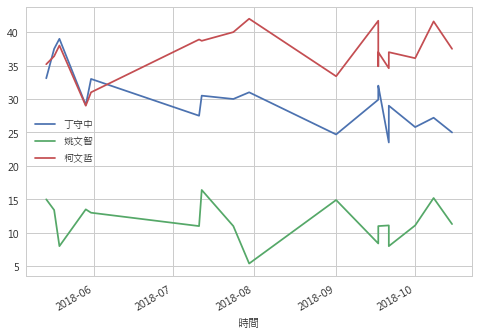

In [45]:
taipei.iloc[:,[0,2,3]].plot()

Text(0, 0.5, '支持率')

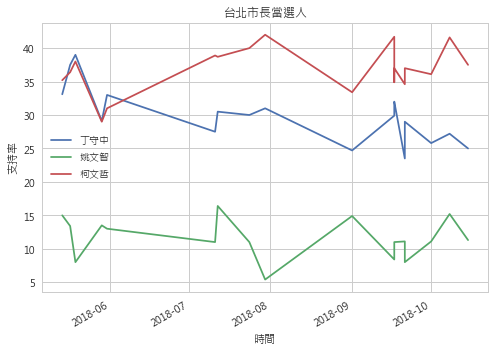

In [46]:
ax = taipei.iloc[:,[0,2,3]].plot()
ax.set_title('台北市長當選人')
ax.set_ylabel('支持率')

### More about:  
1. [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

Matplotlib https://matplotlib.org  
Seaborn
https://seaborn.pydata.org